# ValueMonitor

This page is a visualisation of the ValueMonitor prototype. In case you would like to use the notebook yourself, click on 'Run in Google Colab':

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tristandewildt/ValueMonitor/blob/main/ValueMonitor_Visualising_Value_Change.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tristandewildt/ValueMonitor/blob/main/ValueMonitor_Visualising_Value_Change.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## Table of content:
* [1. Import dataset and packages](#import_dataset_and_packages)
* [2. Gap assessment](#gap_assessment)
* [3. Impact assessment](#impact_assessment)
* [4. Values in different societal_groups](#values_in_different_societal_groups)

## 1. Import dataset and packages  <a name="import_dataset_and_packages"></a>

In this step, the dataset and relavant python packages are imported

In [2]:
!pip install corextopic
!pip install joblib
!pip install tabulate
!pip install simple_colors
!git clone https://github.com/tristandewildt/ValueMonitor_Prototype.git

import sys
sys.path.append('./code')

#import io
from make_topic_model import *
from create_visualisation import *

import ipywidgets as widgets
import pandas as pd
from ipywidgets import interact, interact_manual

%matplotlib inline

'git' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import os, sys, importlib

user = "tristandewildt"
repo = "ValueMonitor_Prototype"
src_dir = "code"
pyfile_1 = "make_topic_model.py"
pyfile_2 = "create_visualisation.py"


if os.path.isdir(repo):
    !rm -rf {repo}

!git clone https://github.com/{user}/{repo}.git

path = f"{repo}/{src_dir}"
if not path in sys.path:
    sys.path.insert(1, path)

make_topic_model = importlib.import_module(pyfile_1.rstrip(".py"))
create_visualisation = importlib.import_module(pyfile_2.rstrip(".py"))
help(create_visualisation)

Help on module create_visualisation:

NAME
    create_visualisation

FUNCTIONS
    coexistence_values(df_with_topics, dict_anchor_words, resampling, values_selected, smoothing, max_value_y)
    
    create_vis_frequency_values(df_with_topics, dict_anchor_words)
    
    create_vis_values_over_time(df_with_topics, dict_anchor_words, resampling, values_to_include_in_visualisation, smoothing, max_value_y)
    
    inspect_words_over_time(df_with_topics, topic_to_evaluate, list_words, resampling, smoothing, max_value_y)
    
    inspect_words_over_time_based_on_most_frequent_words(df_with_topics, dict_anchor_words, model_and_vectorized_data, topic_to_evaluate, number_of_words, resampling, smoothing, max_value_y)
    
    inspect_words_over_time_based_on_own_list(df_with_topics, dict_anchor_words, topic_to_evaluate, list_words, resampling, smoothing, max_value_y)
    
    topic_int_or_string(Topic_selected, dict_anchor_words)
    
    values_in_different_datasets(df_with_topics, selected_te

'git' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!wget -q --show-progress --no-check-certificate 'https://docs.google.com/uc?export=download&id=12ZyryF8MbMYKuhIBEhUUvnvx43_cna56' -O dataset_ValueMonitor_prototype


'wget' is not recognized as an internal or external command,
operable program or batch file.
'id' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=12_EoLJLL_wjc8n1Az3wudsvaTgA605aK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=12_EoLJLL_wjc8n1Az3wudsvaTgA605aK" -O combined_STOA_technologies_saved_topic_model && rm -rf /tmp/cookies.txt

--2022-05-19 13:49:05--  https://docs.google.com/uc?export=download&confirm=t&id=12_EoLJLL_wjc8n1Az3wudsvaTgA605aK
Resolving docs.google.com (docs.google.com)... 172.217.204.138, 172.217.204.101, 172.217.204.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/olh8poi99od5hf4n0i1c5okqd43epgqd/1652968125000/12635936161789443610/*/12_EoLJLL_wjc8n1Az3wudsvaTgA605aK?e=download [following]
--2022-05-19 13:49:06--  https://doc-0c-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/olh8poi99od5hf4n0i1c5okqd43epgqd/1652968125000/12635936161789443610/*/12_EoLJLL_wjc8n1Az3wudsvaTgA605aK?e=download
Resolving doc-0c-2c-docs.googleusercontent.com (doc-0c-2c-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0c-2c-docs.googleusercontent.com (doc-

In [86]:
!pip3 install pickle5
import pickle5 as pickle
with open('dataset_ValueMonitor_prototype', "rb") as fh:
    df = pickle.load(fh)
with open('combined_STOA_technologies_saved_topic_model', "rb") as fh:
    combined_STOA_technologies_saved_topic_model = pickle.load(fh)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


## 2. Creating the topic model <a name="creating_the_topic_model"></a>

In [19]:
dict_anchor_words = {
"Justice and Fairness" : ["justice", "fairness", "fair", "equality", "unfair", "unequal","unjust", "proportional fairness",
                         "equitable"],
"Privacy" : ["privacy", "personal data", "personal sphere","data privacy", "privacy protection", "privacy data", 
             "privacy issues", "user privacy", "privacy preserving", "privacy concerns", "privacy preservation", "confidentiality"],
"Cyber-security" : ["cyber", "security", "cybersecurity", "malicious", "attacks"],
"Environmnental Sustainability" : ["sustainability", "sustainable", "renewable", "durable", "durability",
                                  "sustainable development", "environmental"],
"Transparency" : ["transparency", "transparent", "transparently", "explainability", "interpretability", "explainable",
                 "opaque", "explainable artificial", "explainable ai", "transparency data", "interpretable"],
"Accountability" : ["accountable", "accountability", "accountable", "accounted", "traceability", "traceable"],
"Autonomy" : ["autonomy", "self-determination", "autonomy human", "personal autonomy", "decision making", "human beings",
             "human autonomy", "individual autonomy", "paternalistic"], 
"Democracy" : ["democracy", "democratic", "human rights", "freedom speech", "equal representation",
              "political", "voting", "elections", "participation"], 
"Reliability" : ["reliability", "reliable", "robustness", "robust", "predictability", "predictable"],
"Trust" : ["trust", "trustworthy", "trustworthiness", "confidence", "honesty", "benevolence", "truthful", "truthfulness",
          "public confidence"],
"Well-being" : ["well being", "well-being", "wellbeing", "quality life",
               "good life", "qol", "life satisfaction", "welfare"],
"Inclusiveness" : ["inclusiveness", "inclusive", "inclusivity", "discrimination", "discriminate", "diversity", "exclusion",
                  "diversity inclusion", "bias data", "lack diversity"]
}

list_rejected_words = ["iop", "iop publishing", "publishing ltd", "publishing", "licence iop",
                       "mdpi basel", "basel switzerland", "mdpi", "basel", "licensee mdpi", "licensee", "authors licensee", 
                       "switzerland", "authors", "publishing limited", "emerald", "emerald publishing", ]

list_anchor_words_other_topics = []



In [87]:
best_number_of_topics = 10
number_of_documents_in_analysis = 6000

number_of_words_per_topic_to_show = 10
number_of_words_per_topic = 10

'''--------------------------------------------------------------------------''' 

model_and_vectorized_data = make_anchored_topic_model(df, best_number_of_topics, min(number_of_documents_in_analysis, len(df)), dict_anchor_words, list_anchor_words_other_topics, list_rejected_words)
topics = report_topics(model_and_vectorized_data[0], dict_anchor_words,number_of_words_per_topic)
df_with_topics = create_df_with_topics(df, model_and_vectorized_data[0], model_and_vectorized_data[1], best_number_of_topics)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: ignored

## 4. Gap assessment <a name="gap_assessment"></a>

It takes time before a good topic model is build in which topics adequately represent values. The code in the next cell can be used to import an existing topic model.

In [6]:
# Give here the possibility to import an existing topic model
Import_existing_model = True

'''--------------------------------------------------------------------------''' 
#file_name_existing_model = "combined_STOA_technologies.csv"
number_of_words_per_topic = 10

results_import = import_topic_model(combined_STOA_technologies_saved_topic_model, Import_existing_model, df, number_of_words_per_topic)
if len(results_import):
    df_with_topics = results_import[0]
    topics = results_import[1]
    dict_anchor_words = results_import[2]

NameError: ignored

list

In [95]:
df_with_topics

 [TfidfVectorizer(binary=True, max_df=0.5, min_df=10, ngram_range=(1, 2),
                  norm=None, use_idf=False),
  <5557x19920 sparse matrix of type '<class 'numpy.float64'>'
  	with 1096073 stored elements in Compressed Sparse Row format>,
  ['10th',
   '17th',
   '18th',
   '18th century',
   '1960s',
   '1970s',
   '19th',
   '19th century',
   '20th',
   '20th century',
   '21st',
   '21st century',
   '50th',
   '50th anniversary',
   '5g',
   '5g network',
   '5g networks',
   '5g technology',
   '5g wireless',
   '6g',
   'aa',
   'aaron',
   'ab',
   'abc',
   'abc news',
   'abe',
   'abilities',
   'ability',
   'ability data',
   'ability human',
   'ability people',
   'able',
   'able access',
   'able data',
   'able many',
   'able new',
   'able other',
   'able people',
   'able something',
   'able things',
   'abnormal',
   'abortion',
   'abortion rights',
   'abortions',
   'about',
   'aboutâ',
   'above',
   'abraham',
   'abraham lincoln',
   'abreland',
 

In [91]:
selected_technology = "AI" # "IoT", "AI"

'''--------------------------------------------------------------------------''' 

values_in_different_datasets(df_with_topics, selected_technology, dict_anchor_words)


AttributeError: ignored

In [ ]:
selected_value = "Privacy"
selected_dataset = "ETHICS"
size_sample = 10

show_extracts = True # True, False
show_full_text  = False # True, False

'''--------------------------------------------------------------------------''' 

df_with_topics_selected_technology = df_with_topics[df_with_topics[selected_technology] == True]
df_with_topics_selected_technology_dataset = df_with_topics_selected_technology[df_with_topics_selected_technology['dataset'] == selected_dataset]
print_sample_articles_topic(df_with_topics_selected_technology_dataset, dict_anchor_words, topics, selected_value, size_sample, show_extracts, show_full_text)

Keywords related to Privacy found in text:['privacy', 'personal data', 'data privacy', 'privacy protection', 'privacy concerns', 'privacy data', 'user privacy', 'privacy issues', 'security privacy', 'privacy security']

Article 4839
Title: Automated experimentation in walden 3.0: The next step in profiling, predicting, control and surveillance
Dataset: ETHICS
Values:

 - results of such strategies, and learn from their effects. When [privacy] issues are framed as "control over information" it becomes apparent

 - experimentation. Instead of bringing forward Orwell's 1984 dystopia in the [privacy] domain as is typically done, I sketch how current developments


Article 5939
Title: Cultural Differences as Excuses? Human Rights and Cultural Values in Global Ethics and Governance of AI
Dataset: ETHICS
Values:


Article 1363
Title: The regulatory intersections between artificial intelligence, data protection and cyber security: challenges and opportunities for the EU legal framework
Dataset

## 5. Impact assessment <a name="impact_assessment"></a>

The occurence of values can be traced over time.

['Justice and Fairness', 'Privacy', 'Cyber-security', 'Environmnental Sustainability', 'Transparency', 'Accountability', 'Autonomy', 'Democracy', 'Reliability', 'Trust', 'Well-being', 'Inclusiveness']


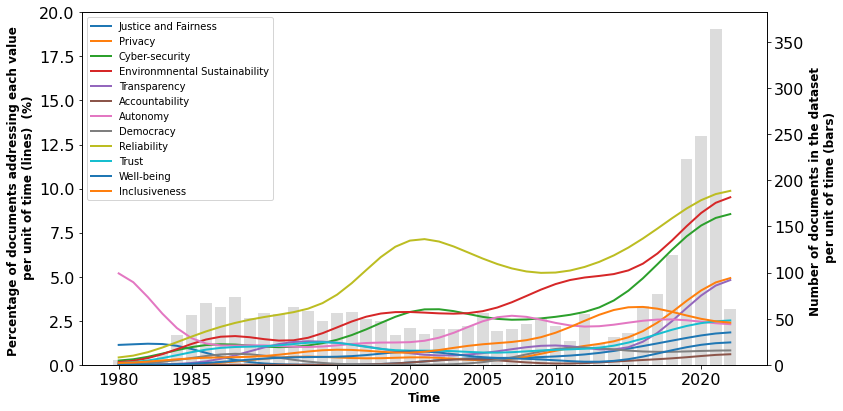

<Figure size 8000x5600 with 0 Axes>

In [ ]:
selected_technology = "AI" # "IoT", "AI"
selected_dataset = "TECH"

resampling = "Y" # "D", "M", "Y"
smoothing = 1 # The bigger the value, the smoother it is
max_value_y = 20 # this is to set the max of the y axis

T0 = "1980-01-01" #YYYY-MM-DD
T1 = "2023-01-01" #YYYY-MM-DD

'''--------------------------------------------------------------------------''' 

values_to_include_in_visualisation = []
df_with_topics_short = df_with_topics.loc[(df_with_topics['date'] >= dateutil.parser.parse(T0)) & (df_with_topics['date'] <= dateutil.parser.parse(T1))]
df_with_topics_selected_technology = df_with_topics_short[df_with_topics_short[selected_technology] == True]
df_with_topics_selected_technology_dataset = df_with_topics_selected_technology[df_with_topics_selected_technology['dataset'] == selected_dataset]
create_vis_values_over_time(df_with_topics_selected_technology_dataset, dict_anchor_words, resampling, values_to_include_in_visualisation, smoothing, max_value_y)

In [ ]:
T0 = "1960-01-01" #YYYY-MM-DD
T1 = "2023-01-01" #YYYY-MM-DD

selected_value = "Privacy"
size_sample = 10

show_extracts = True # True, False
show_full_text  = False # True, False

'''--------------------------------------------------------------------------''' 

df_with_topics_short = df_with_topics.loc[(df_with_topics['date'] >= dateutil.parser.parse(T0)) & (df_with_topics['date'] <= dateutil.parser.parse(T1))]
print_sample_articles_topic(df_with_topics_selected_technology_dataset, dict_anchor_words, topics, selected_value, size_sample, show_extracts, show_full_text)

Keywords related to Privacy found in text:['privacy', 'personal data', 'data privacy', 'privacy protection', 'privacy concerns', 'privacy data', 'user privacy', 'privacy issues', 'security privacy', 'privacy security']

Article 113217
Title: The big question: The rise of the virtual office
Dataset: TECH
Values:

 - its conventional boundaries, key challenges must be met, including the [privacy] and security issues posed by a distributed workforce of people


Article 267063
Title: Regulating the internet of things: Discrimination, privacy, and cybersecurity in the artificial intelligence age
Dataset: TECH
Values:


Article 604608
Title: DID-efed: Facilitating federated learning as a service with decentralized identities
Dataset: TECH
Values:

 - EU General Data Protection Regulation (GDPR) raises concerns about individuals' [privacy] in big data. Federated learning (FL) emerges as a functional

 - models shared among multiple parties while still complying with user [privacy] and data co

## 6. Values in different societal groups <a name="values_in_different_societal_groups"></a>

ValueMonitor can be used to evaluate which values different societal groups tend to discuss.

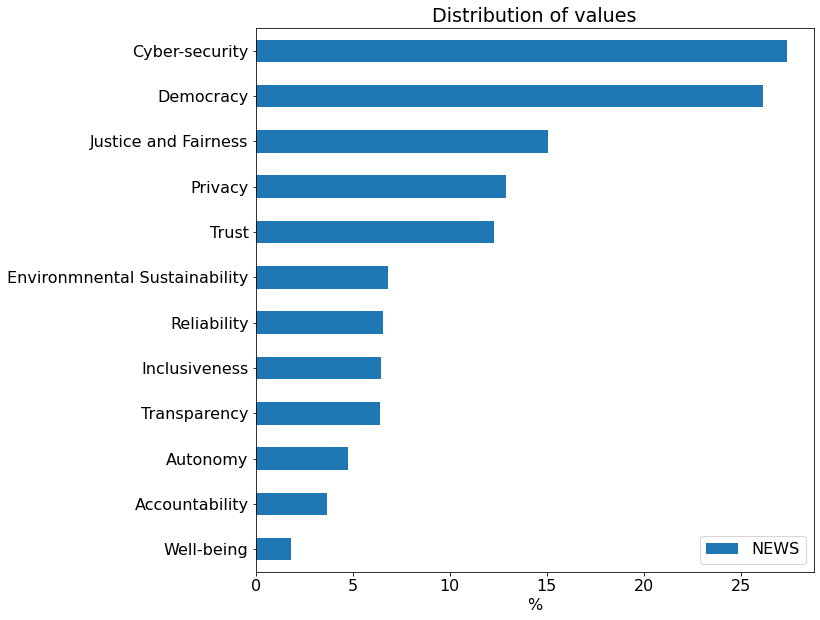

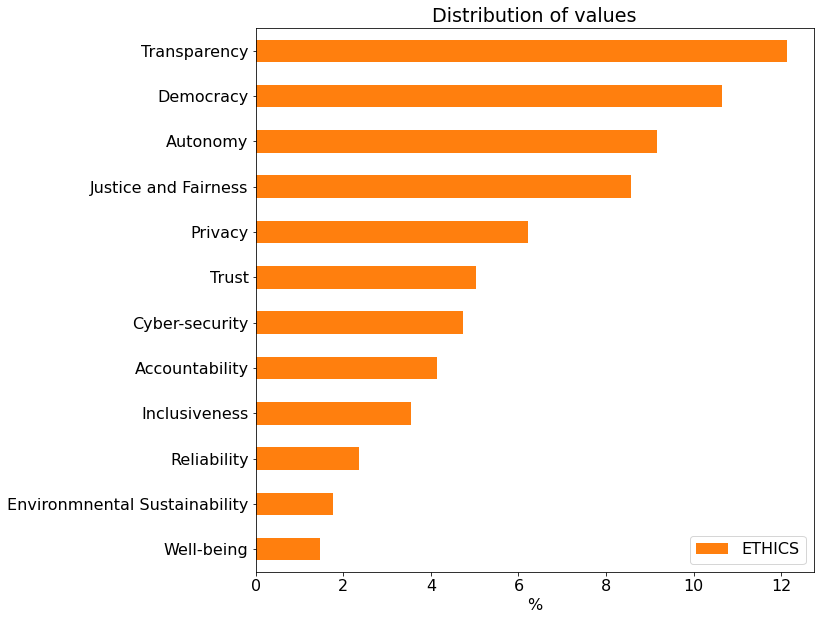

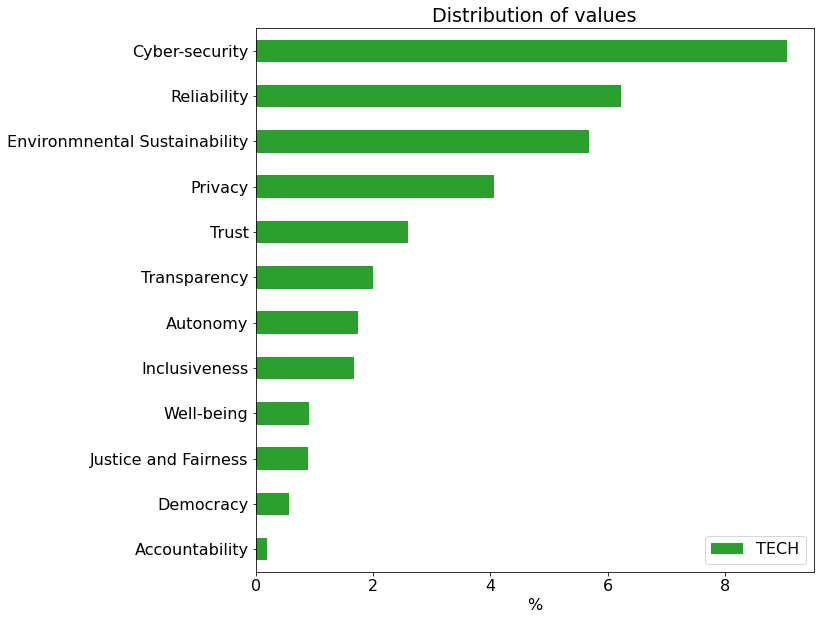

In [ ]:
list_datasets = ['NEWS', 'ETHICS', 'TECH']

values_in_different_groups(df_with_topics, dict_anchor_words, list_datasets)

In [ ]:
selected_value = "Inclusiveness"
selected_dataset = "NEWS"
size_sample = 10

show_extracts = True # True, False
show_full_text  = False # True, False

'''--------------------------------------------------------------------------''' 

df_with_topics_selected_technology_dataset = df_with_topics[df_with_topics['dataset'] == selected_dataset]
print_sample_articles_topic(df_with_topics_selected_technology_dataset, dict_anchor_words, topics, selected_value, size_sample, show_extracts, show_full_text)

Keywords related to Inclusiveness found in text:['diversity', 'discrimination', 'inclusive', 'lack diversity', 'inclusivity', 'diversity inclusion', 'bias data', 'discriminate', 'inclusiveness', 'inclusion']

Article 511486
Title: What banking jobs and finance will look like in 10 years
Dataset: NEWS
Values:

 - bigger LP focus on ESG factors Kara Helander, the chief [inclusion] and diversity officer at The Carlyle Group, said she expected

 - focus on ESG factors Kara Helander, the chief inclusion and [diversity] officer at The Carlyle Group, said she expected firms to

 - their investing in impact and ESG, and improve the overall [diversity] makeup of their professionals, as investors' want to do good


Article 86544
Title: The ethics of transhumanism – TechCrunch
Dataset: NEWS
Values:

 - and social issues. Indeed, there are already cases of genetic [discrimination] in the insurance industry. However, understanding genetics is only the


Article 120834
Title: Tech platforms should f